<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Casos-de-Uso-de-K-Means" data-toc-modified-id="Casos-de-Uso-de-K-Means-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Casos de Uso de K-Means</a></span></li><li><span><a href="#Ejercicio-Python-de-K-means" data-toc-modified-id="Ejercicio-Python-de-K-means-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ejercicio Python de K-means</a></span></li><li><span><a href="#Cargamos-los-datos-de-entrada-del-archivo-csv" data-toc-modified-id="Cargamos-los-datos-de-entrada-del-archivo-csv-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cargamos los datos de entrada del archivo csv</a></span></li><li><span><a href="#Visualizamos-los-datos" data-toc-modified-id="Visualizamos-los-datos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualizamos los datos</a></span></li><li><span><a href="#Creamos-el-modelo" data-toc-modified-id="Creamos-el-modelo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Creamos el modelo</a></span></li></ul></div>

## Casos de Uso de K-Means

*Tomado de: https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/*

El algoritmo de Clustering K-means es uno de los más usados para encontrar grupos ocultos, o sospechados en teoría sobre un conjunto de datos no etiquetado. Esto puede servir para confirmar -o desterrar- alguna teoría que teníamos asumida de nuestros datos. Y también puede ayudarnos a descubrir relaciones asombrosas entre conjuntos de datos, que de manera manual, no hubiéramos reconocido. Una vez que el algoritmo ha ejecutado y obtenido las etiquetas, será fácil clasificar nuevos valores o muestras entre los grupos obtenidos.

Algunos casos de uso son:

   * Segmentación por Comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
   * Categorización de Inventario: agrupar productos por actividad en sus ventas
   * Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal



## Ejercicio Python de K-means
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Como ejemplo utilizaremos de entradas un conjunto de datos que obtuvo el autor, en el que se analizaban rasgos de la personalidad de usuarios de Twitter. El [autor](https://www.aprendemachinelearning.com/sobre-mi/) ha  filtrado a 140 “famosos” del mundo en diferentes areas: deporte, cantantes, actores, etc. Basado en una metodología de psicología conocida como “Ocean: The Big Five” tendemos como características de entrada:

* usuario (el nombre en Twitter)
*    “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
*   “co” =Conscientiousness – grado de orden, prolijidad, organización
*    “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
*    “ag” = Agreeableness – grado de empatía con los demás, temperamento
*    “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
*    Wordcount – Cantidad promedio de palabras usadas en sus tweets
*    Categoria – Actividad laboral del usuario (actor, cantante, etc.)

Utilizaremos el algoritmo K-means para que agrupe estos usuarios -no por su actividad laboral- si no, por sus similitudes en la personalidad. 

En la siguiente base de datos las categoría que representan la actividad laborla de los famosos están codificados según el siguiente diccionario;
```python
{1:"actores", 2:"cantantes", 3:"modelo", 4:"TV", 5:"radio", 6:"tecnología", 7:"deportes", 8:"politica", 9:"escritor"}
```

## Cargamos los datos de entrada del archivo csv

In [3]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [5]:
dataframe.columns=["usuario","Apertura Mental","Escrupulosidad","Extraversión","Empatia","Neuroticismo","Cantidad de palabras","Categoría"]

In [6]:
dataframe["Categoría"]=dataframe["Categoría"].replace({1:"actores", 2:"cantantes", 3:"modelo", 4:"TV", 5:"radio", 6:"tecnología", 7:"deportes", 8:"politica", 9:"escritor"})

In [8]:
dataframe

,usuario,Apertura Mental,Escrupulosidad,Extraversión,Empatia,Neuroticismo,Cantidad de palabras,Categoría
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,deportes
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,deportes
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,TV
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,cantantes
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,TV
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,deportes
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,TV
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,cantantes
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,actores


In [9]:
dataframe.describe()

,Apertura Mental,Escrupulosidad,Extraversión,Empatia,Neuroticismo,Cantidad de palabras
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200


In [10]:
#vemos cuantos usuarios hay de cada categoria
dataframe.groupby('Categoría').size()

Categoría
TV            19
actores       27
cantantes     34
deportes      17
escritor       6
modelo         9
politica      16
radio          4
tecnología     8
dtype: int64

## Visualizamos los datos

Visualizaremos la distribución de cada rasgo psicológico en esta población.

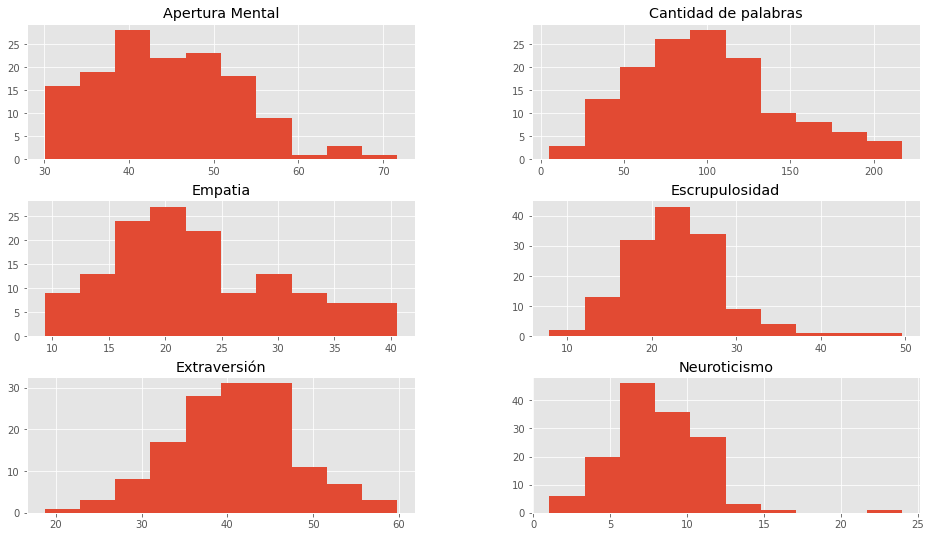

In [19]:
#Pintamos un histograma para cada una de las variables cuantitativas
dataframe.drop(['Categoría'],1).hist()
plt.show()

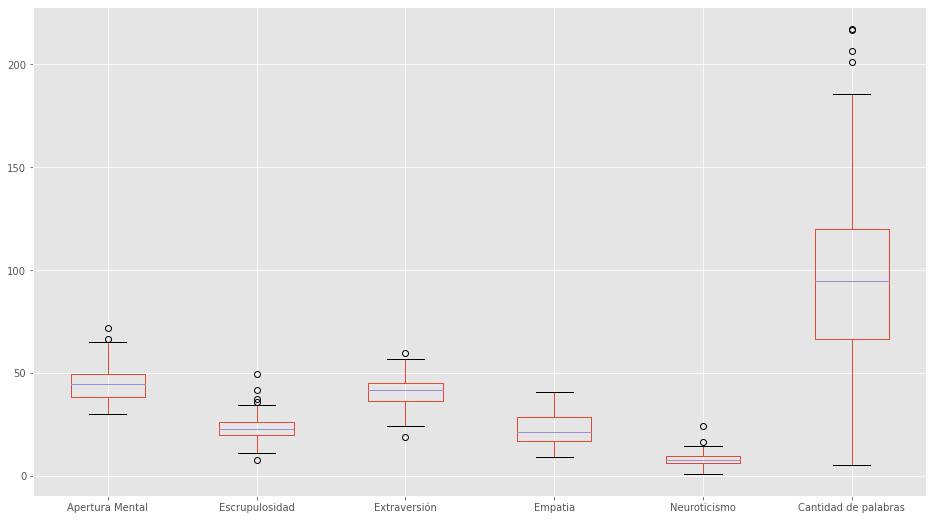

In [20]:
dataframe.drop(['Categoría'],1).boxplot()
plt.show()

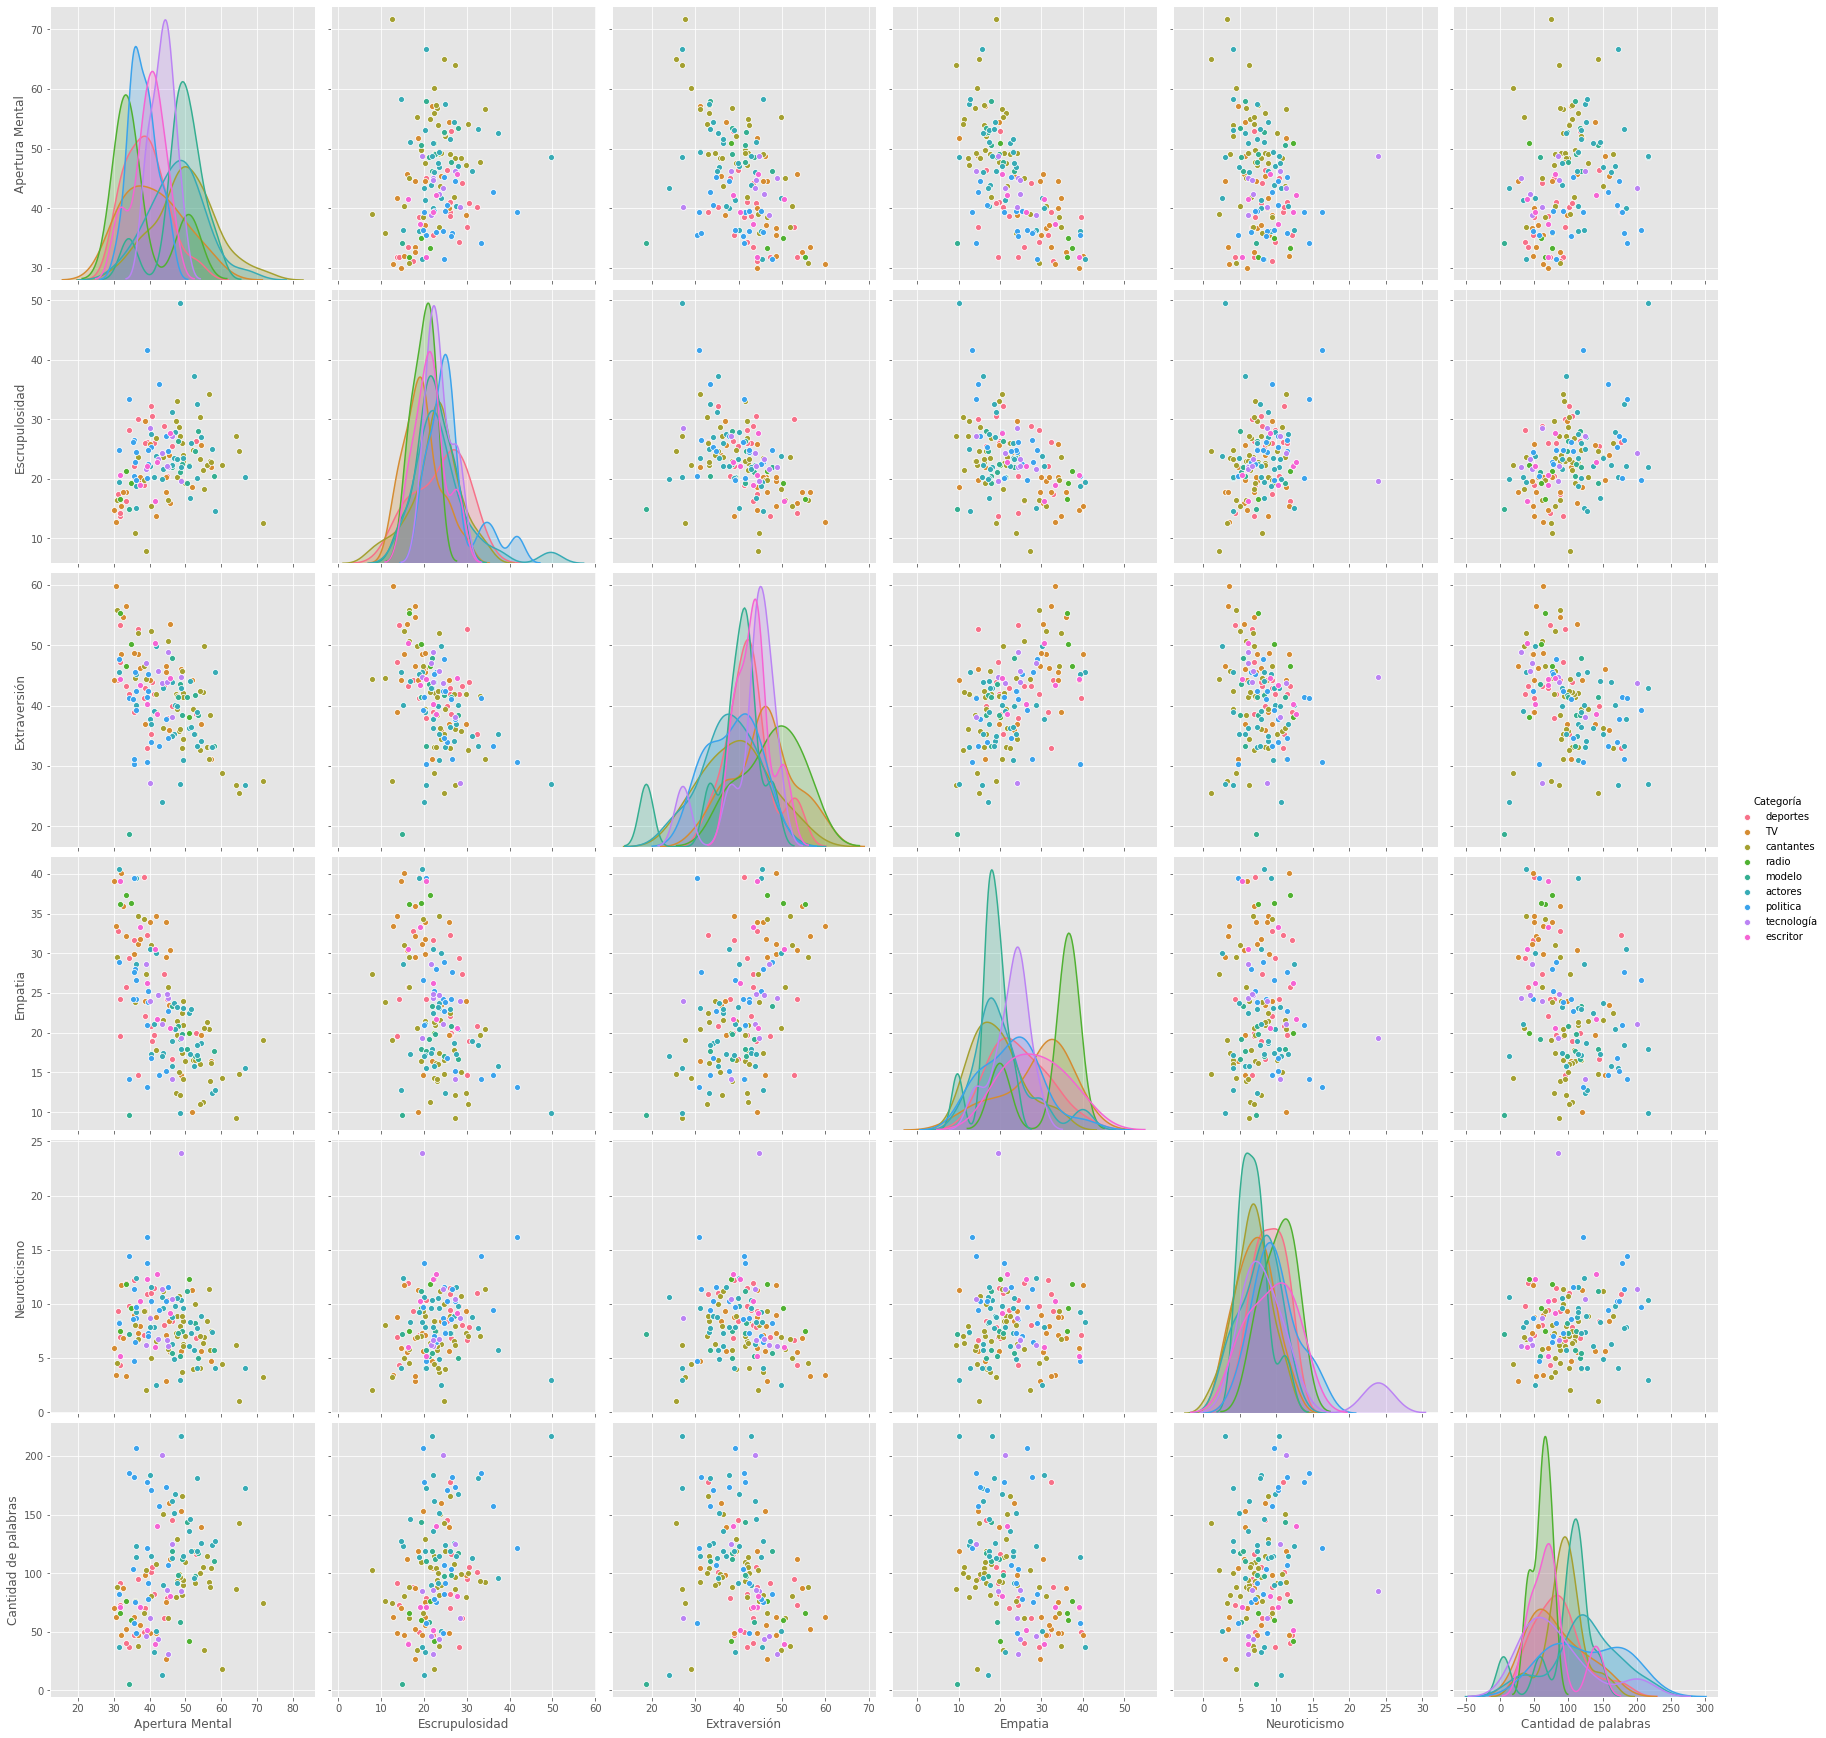

In [23]:
sb.pairplot(dataframe.dropna(), hue='Categoría',height=4,vars=dataframe.columns[1:-1],kind='scatter')

Hagamos componentes principales para tratar de disminuir la dimensionalidad de estos datos.

*Nota: Evidentemente el gráfico muestra poca correlación entre variables, es posible que el PCA no sea provechoso*

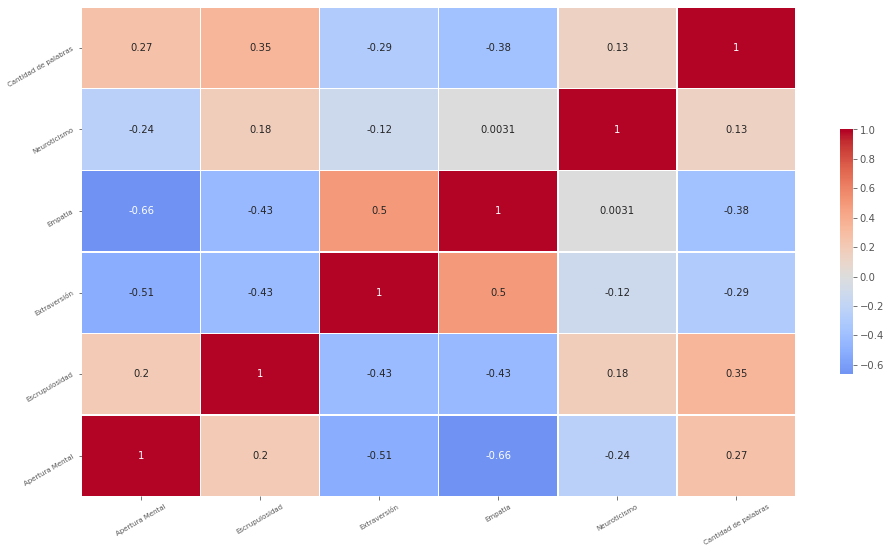

In [25]:
fig, ax = plt.subplots()
s=sb.heatmap(pd.DataFrame(data=dataframe[dataframe.columns[1:-1]]).corr(),cmap='coolwarm', center=0,
             linewidths=.5, cbar_kws={"shrink": .5},annot=True) 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
ax.set_xlim(0,6)
ax.set_ylim(0,6)
plt.show()

In [28]:
import prince
pca = prince.PCA(
     n_components=6,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
 )
pca = pca.fit(dataframe[dataframe.columns[1:-1]])

In [30]:
np.cumsum(pca.explained_inertia_)

array([0.44010893, 0.65102982, 0.77258975, 0.87768062, 0.95749583,
       1.        ])

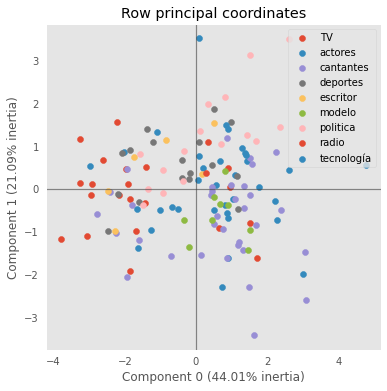

In [40]:
 ax = pca.plot_row_coordinates(
     dataframe[dataframe.columns[1:-1]],
     ax=None,
     figsize=(6, 6),
     x_component=0,
     y_component=1,
     labels=None,
     color_labels=dataframe['Categoría'],
     ellipse_outline=False,
     ellipse_fill=False,
     show_points=True
 )

## Creamos el modelo

In [43]:
X = np.array(dataframe[dataframe.columns[1:-1]])
y = np.array(dataframe['Categoría'])
yu=np.array(dataframe['Categoría'].unique())
X.shape

(140, 6)

In [44]:
dicty={}
for i in enumerate(yu):
    dicty[i[1]]=i[0]
dicty

{'deportes': 0,
 'TV': 1,
 'cantantes': 2,
 'radio': 3,
 'modelo': 4,
 'actores': 5,
 'politica': 6,
 'tecnología': 7,
 'escritor': 8}

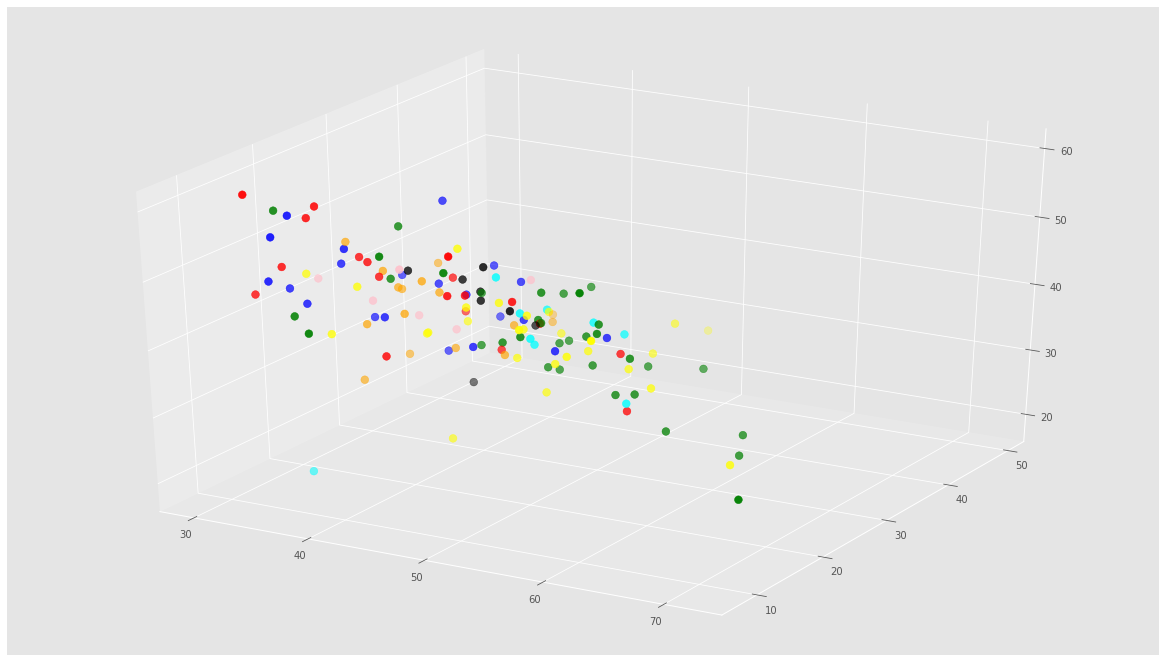

In [45]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[dicty[row]])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

# Buscamos el valor K

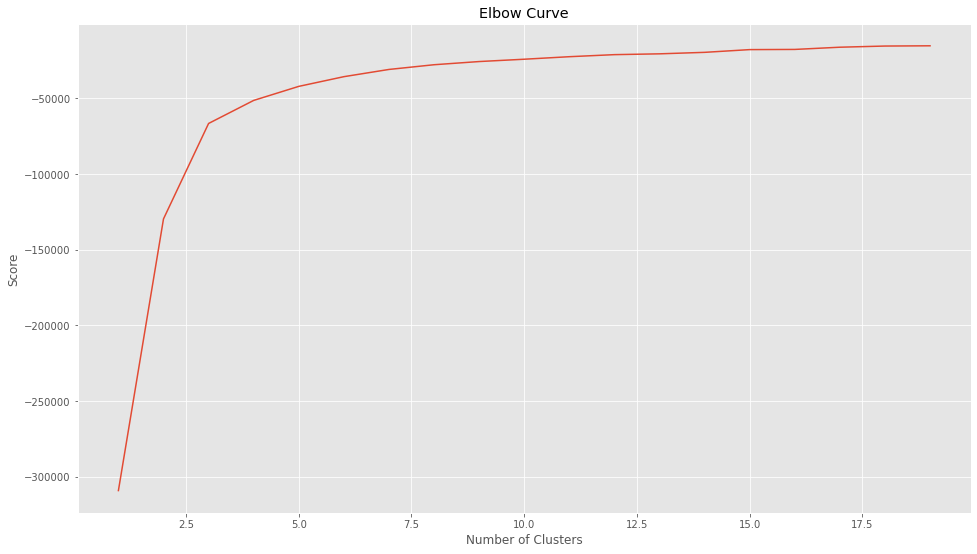

In [46]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [59]:
# Para el ejercicio, elijo 3 como un buen valor de K. Pero podría ser otro.
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 46.49143107  25.34137918  37.01146479  19.81602868   8.69631846
  168.11213214]
 [ 47.2425514   23.91600052  40.13164636  19.99707409   7.93251904
  101.53036119]
 [ 38.9118158   20.10818429  44.04174649  29.19869211   7.66751098
   51.34430667]]


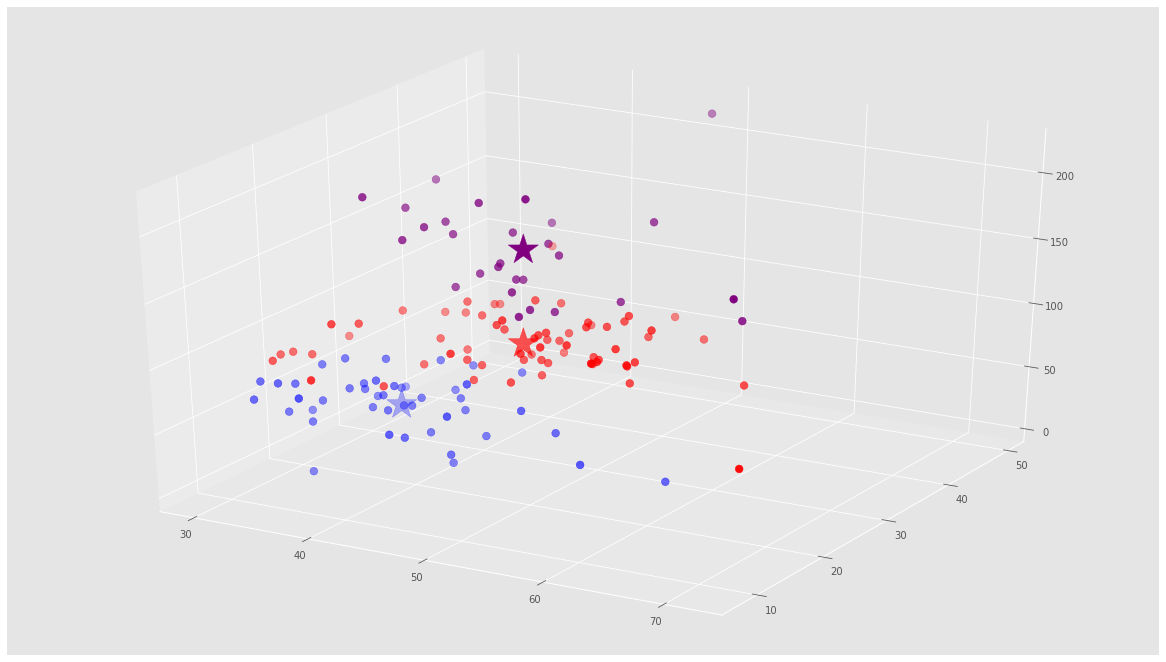

In [60]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['purple','red','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 5], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 5], marker='*', c=colores, s=1000)

In [79]:
C[:,5]

array([168.11213214, 101.53036119,  51.34430667])

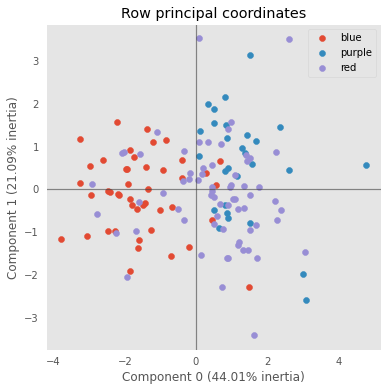

In [61]:
 ax = pca.plot_row_coordinates(
     dataframe[dataframe.columns[1:-1]],
     ax=None,
     figsize=(6, 6),
     x_component=0,
     y_component=1,
     labels=None,
     color_labels=asignar,
     ellipse_outline=False,
     ellipse_fill=False,
     show_points=True
 )

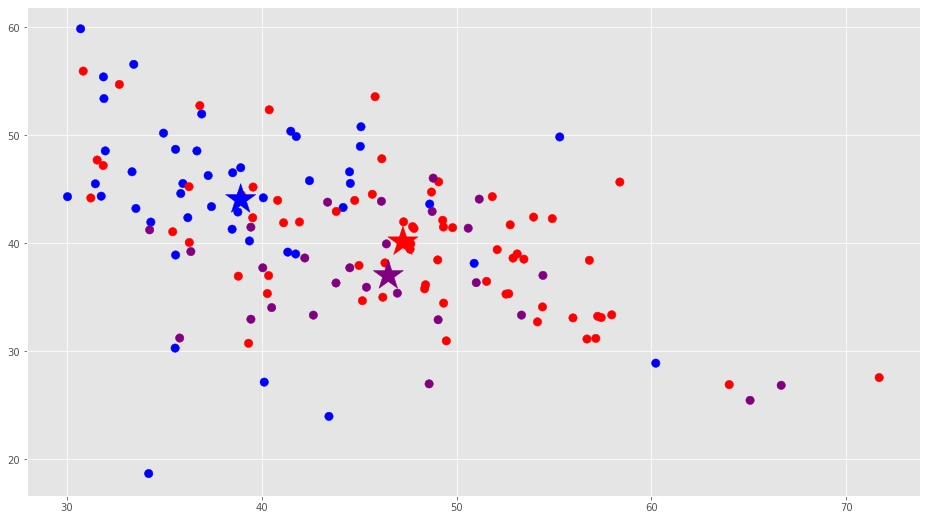

In [83]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['Apertura Mental'].values
f2 = dataframe['Extraversión'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [86]:
dataframe

,usuario,Apertura Mental,Escrupulosidad,Extraversión,Empatia,Neuroticismo,Cantidad de palabras,Categoría
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,deportes
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,deportes
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,TV
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,cantantes
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,TV
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,deportes
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,TV
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,cantantes
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,actores


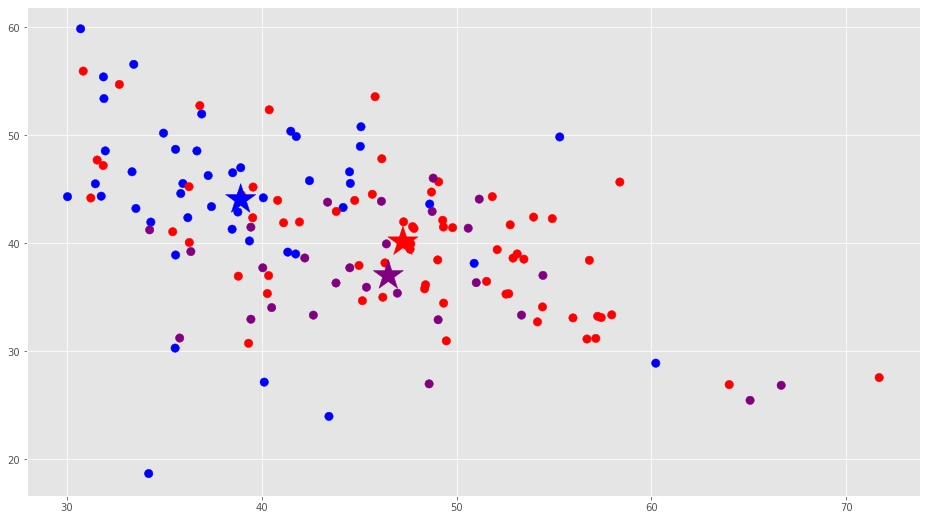

In [87]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['Apertura Mental'].values
f2 = dataframe['Extraversión'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

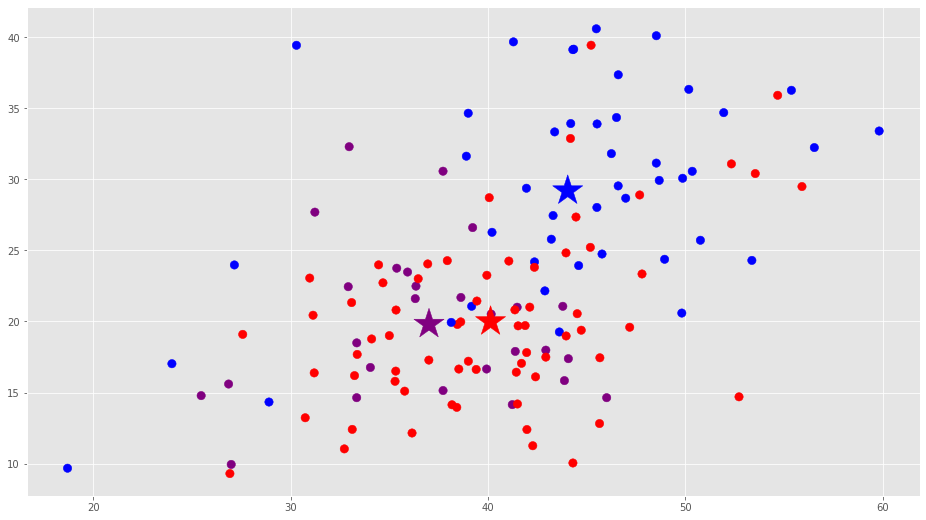

In [82]:
f1 = dataframe['Extraversión'].values
f2 = dataframe['Empatia'].values

'''
# este codigo comentado agrega las categorias sobre cada punto
for label, x, y in zip(dataframe['categoria'].values, f1, f2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 3], marker='*', c=colores, s=1000)
plt.show()

In [65]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['Categoría'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,purple,28
1,red,67
2,blue,45


In [66]:
!pip install tabulate

In [67]:
from IPython.core.display import display,Markdown
# Veamos cuantos usuarios en cada categoria
for i in range(5):
    group_referrer_index = copy['label'] ==i
    group_referrals = copy[group_referrer_index]
    diversidadGrupo =  pd.DataFrame()
    diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
    display(Markdown(diversidadGrupo.to_markdown()))
    print()

| categoria   |   cantidad |
|:------------|-----------:|
| TV          |          3 |
| actores     |         10 |
| cantantes   |          3 |
| deportes    |          2 |
| escritor    |          1 |
| modelo      |          1 |
| politica    |          7 |
| tecnología  |          1 |

| categoria   |   cantidad |
|:------------|-----------:|
| TV          |          5 |
| actores     |         13 |
| cantantes   |         25 |
| deportes    |          8 |
| escritor    |          1 |
| modelo      |          6 |
| politica    |          6 |
| tecnología  |          3 |

| categoria   |   cantidad |
|:------------|-----------:|
| TV          |         11 |
| actores     |          4 |
| cantantes   |          6 |
| deportes    |          7 |
| escritor    |          4 |
| modelo      |          2 |
| politica    |          3 |
| radio       |          4 |
| tecnología  |          4 |

| cantidad   |
|------------|

| cantidad   |
|------------|

In [68]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([89, 57, 98])

In [69]:
#Los usuarios más cercanos al centroide
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

KevinSpacey
heidiklum
maria_patino


In [71]:
from IPython.core.display import display, HTML

In [72]:
#miramos los usuarios de cada grupo
text="<table><tr> <td> Grupo 0</td><td> Grupo 1</td><td> Grupo 2</td><td> Grupo 3</td><td> Grupo 4</td></tr><tr>"
for i in range(5):
    text+="<td>"
    for index, row in copy.iterrows():
        if row["label"] == i:
            text+="<p>"+ row["usuario"]+" " +row["categoria"]+"</p>"
    text+="</td>"
text+="</tr></table>"
display(HTML(text))

        

Grupo 0,Grupo 1,Grupo 2,Grupo 3,Grupo 4
andyroddick deportesandy_murray deportesBarackObama politicaBillGates tecnologíacarmenelectra modelocesarmillan TVClyburn politicaDiane_Keaton actoresEdwardNorton actoresHerreraBeutler politicaHillaryClinton politicaJerrySeinfeld actoresjessicaalba actoresjiminhofe politicajimlangevin politicajk_rowling escritorJohnKerry politicajustdemi actoresKevinSpacey actoresladygaga cantantesLeoDiCaprio actoresMeganFox516 actoresMelanieGriffith actoresOfficialAdele cantantesOprah TVTheEllenShow TVthelittleidiot cantantesTheReal_Jlh actores,aguerosergiokun deportesAlejandroSanz cantantesandresiniesta8 deportesAngelAlessandra modeloaplusk actoresAvrilLavigne cantantesbritneyspears cantantesCasillasWorld deportescelinedion cantantescharliesheen actoresCindyCrawford modeloCourteneyCox actoresCourtney cantantesCristiano deportesdavidbisbal cantantesDavid_Busta cantantesEmWatson actoresenrique305 cantantesepunset tecnologíaEvaLongoria modeloFergie cantantesgwenstefani cantantesGwynethPaltrow actoresheidiklum modeloHilaryDuff cantanteshughlaurie TVIamStevenT cantantesIanMcKellen actoresierrejon politicaJessieJ cantantesJesusCalleja TVJesusEncinar tecnologíajimmyfallon TVJLo cantantesjtimberlake cantantesJudgeJudy TVjustinbieber cantanteskanyewest cantantesKateUpton modelokatyperry cantantesKidRock cantanteskobebryant deportesLennyKravitz cantantesMariahCarey cantantesmartinvars tecnologíaMileyCyrus actoresNadalMiki TVPablo_Iglesias_ politicapaugasol deportespaulocoelho escritorpnique politicaRafaelNadal deportesRealHughJackman actoresRep_Hunter politicarihanna cantantessanchezcastejon politicaSarahPalinUSA politicaSJP actoresspringsteen cantantestaylorswift13 cantantesTomCruise actorestomhanks actoresusainbolt deportesvictoriabeckham modeloxoellopez cantantesZacEfron actores_josecoronado_ actores,3gerardpique deportesalbertochicote TValfredocasero1 TValo_oficial deportesandykusnetzoff radioantoniobanderas actoresBarRefaeli modeloBerto_Romero TVBuenafuente TVCarlosAuryn cantantesCarrie_Br4dshaw modeloCFKArgentina politicaChristianG_7 TVCristiPedroche TVDaniMateoAgain radioDANIROVIRA actoresDidacLee tecnologíadrexlerjorge cantantesedans tecnologíaeva_hache actoresFALCAO deportesFernandezAnibal politicafieritacatalano tecnologíafoofighters cantantesGeorgeHWBush politicaiescolar escritorjordievole TVjordiGlez TVjosjaviersantos escritorJPVarsky radioKAKA deporteslorenzo99 deportesmanuginobili deportesmaria_patino TVpabloalboran cantantesPaulaMeliveo radioperezreverte escritorporliniers escritorristomejide TVSerranoIsmael cantantesshakira cantantesSSantiagosegura actoresstevewoz tecnologíaXabiAlonso deportesXaviRodriguez TV,,


# Clasificación de nuevos registros

In [75]:
X_new = np.array([[45.92,57.74,15.66,12.11,97,89.9]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

#NOTA: en el array podemos poner más de un array para evaluar a varios usuarios nuevos a la vez

[1]


NOTA FINAL: Los resultados obtenidos pueden varias de ejecución en ejecución pues al inicializar aleatoriamente los centroids, podemos obtener grupos distintos o los mismos pero en distinto orden y color